In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load the datasets
prices_df = pd.read_csv('/content/Food_Prices_Kenya.csv')
counties_df = pd.read_csv('/content/Kenyan_Counties_with_Regions.csv')

# Display the first few rows of each dataframe to understand their structure
print("Prices Dataset:")
print(prices_df.head())
print("\nCounties Dataset:")
print(counties_df.head())

Prices Dataset:
       Year     Month   Region   Commodity   Unit   Priceflag   Pricetype  \
0     #year    #month  #region  #commodity  #unit  #priceflag  #pricetype   
1  2006       January    Coast       Maize     KG      actual      Retail   
2  2006      February    Coast       Maize     KG      actual      Retail   
3  2006         March    Coast       Maize     KG      actual      Retail   
4  2006         April    Coast       Maize     KG      actual      Retail   

    Currency   Price   Usdprice  ... Unnamed: 19 Unnamed: 20 Unnamed: 21  \
0  #currency  #price  #usdprice  ...         NaN         NaN         NaN   
1        KES   16.13     0.2235  ...         NaN         NaN         NaN   
2        KES   15.93     0.2208  ...         NaN         NaN         NaN   
3        KES   16.03     0.2221  ...         NaN         NaN         NaN   
4        KES   16.63     0.2305  ...         NaN         NaN         NaN   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 

In [18]:
# Display the first few rows and column names of each dataframe to understand their structure
print("Prices Dataset Columns and First Few Rows:")
print(prices_df.columns)
print(prices_df.head())

print("\nCounties Dataset Columns and First Few Rows:")
print(counties_df.columns)
print(counties_df.head())


Prices Dataset Columns and First Few Rows:
Index(['Year', 'Month', 'Region', 'Commodity', 'Unit', 'Priceflag',
       'Pricetype', 'Currency', 'Price', 'Usdprice', 'Amount Produced(Tonnes)',
       'Annual Rainfall', 'Annual Temperature', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')
       Year     Month   Region   Commodity   Unit   Priceflag   Pricetype  \
0     #year    #month  #region  #commodity  #unit  #priceflag  #pricetype   
1  2006       January    Coast       Maize     KG      actual      Retail   
2  2006      February    Coast       Maize     KG      actual      Retail   
3  2006         March    Coast       Maize     KG      actual      Retail   
4  2006         April    Coast       Maize     KG      actual      Retail   

    Cur

In [19]:
# Drop all unnamed columns
prices_df = prices_df.loc[:, ~prices_df.columns.str.contains('^Unnamed')]

# Remove rows where 'Year' column has invalid values like '#year'
prices_df = prices_df[prices_df['Year'] != '#year']

# Handle missing values (NaN) in the 'Year' column before converting to integer
# Option 1: Remove rows with NaN values in 'Year'
prices_df.dropna(subset=['Year'], inplace=True)

# Convert 'Year' column to integer
prices_df['Year'] = prices_df['Year'].astype(int)

# Convert 'Month' column to a consistent format (e.g., integer representing the month)
# Assuming 'Month' column is in the format of month names
months_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
prices_df['Month'] = prices_df['Month'].map(months_mapping)

# Display the cleaned dataframe
print("Cleaned Prices Dataset Columns:")
print(prices_df.columns)
print(prices_df.head())

Cleaned Prices Dataset Columns:
Index(['Year', 'Month', 'Region', 'Commodity', 'Unit', 'Priceflag',
       'Pricetype', 'Currency', 'Price', 'Usdprice', 'Amount Produced(Tonnes)',
       'Annual Rainfall', 'Annual Temperature'],
      dtype='object')
   Year  Month Region Commodity Unit Priceflag Pricetype Currency  Price  \
1  2006    1.0  Coast     Maize   KG    actual    Retail      KES  16.13   
2  2006    2.0  Coast     Maize   KG    actual    Retail      KES  15.93   
3  2006    3.0  Coast     Maize   KG    actual    Retail      KES  16.03   
4  2006    4.0  Coast     Maize   KG    actual    Retail      KES  16.63   
5  2006    5.0  Coast     Maize   KG    actual    Retail      KES  16.43   

  Usdprice Amount Produced(Tonnes) Annual Rainfall Annual Temperature  
1   0.2235                  9741.6              23                 27  
2   0.2208                  9741.6              13                 27  
3   0.2221                  9741.6              42                 27  
4   

In [20]:
# Verify the cleaned data
print("Cleaned Prices Dataset:")
print(prices_df.head())

print("\nCounties Dataset:")
print(counties_df.head())


Cleaned Prices Dataset:
   Year  Month Region Commodity Unit Priceflag Pricetype Currency  Price  \
1  2006    1.0  Coast     Maize   KG    actual    Retail      KES  16.13   
2  2006    2.0  Coast     Maize   KG    actual    Retail      KES  15.93   
3  2006    3.0  Coast     Maize   KG    actual    Retail      KES  16.03   
4  2006    4.0  Coast     Maize   KG    actual    Retail      KES  16.63   
5  2006    5.0  Coast     Maize   KG    actual    Retail      KES  16.43   

  Usdprice Amount Produced(Tonnes) Annual Rainfall Annual Temperature  
1   0.2235                  9741.6              23                 27  
2   0.2208                  9741.6              13                 27  
3   0.2221                  9741.6              42                 27  
4   0.2305                   16236             108                 26  
5   0.2278                   16236             142                 26  

Counties Dataset:
  Region      County
0  Coast     Mombasa
1  Coast       Kwale
2  Co

In [21]:
# Create an expanded dataset
expanded_data = []

years = prices_df['Year'].unique()
months = prices_df['Month'].unique()

for region in counties_df['Region'].unique():
    counties_in_region = counties_df[counties_df['Region'] == region]['County']
    for county in counties_in_region:
        for year in years:
            for month in months:
                temp_df = prices_df[(prices_df['Region'] == region) & (prices_df['Year'] == year) & (prices_df['Month'] == month)]
                if not temp_df.empty:
                    row = temp_df.iloc[0].copy()  # Take the first row as a template
                    row['County'] = county
                    expanded_data.append(row)

expanded_df = pd.DataFrame(expanded_data)

# Display the expanded dataframe
print("Expanded Dataset:")
print(expanded_df.head())
print(expanded_df.columns)


Expanded Dataset:
   Year  Month Region Commodity Unit Priceflag Pricetype Currency  Price  \
1  2006    1.0  Coast     Maize   KG    actual    Retail      KES  16.13   
2  2006    2.0  Coast     Maize   KG    actual    Retail      KES  15.93   
3  2006    3.0  Coast     Maize   KG    actual    Retail      KES  16.03   
4  2006    4.0  Coast     Maize   KG    actual    Retail      KES  16.63   
5  2006    5.0  Coast     Maize   KG    actual    Retail      KES  16.43   

  Usdprice Amount Produced(Tonnes) Annual Rainfall Annual Temperature   County  
1   0.2235                  9741.6              23                 27  Mombasa  
2   0.2208                  9741.6              13                 27  Mombasa  
3   0.2221                  9741.6              42                 27  Mombasa  
4   0.2305                   16236             108                 26  Mombasa  
5   0.2278                   16236             142                 26  Mombasa  
Index(['Year', 'Month', 'Region', 'Comm

In [22]:
# Check the unique values in key columns to ensure data integrity
print("Unique Regions in Expanded Dataset:", expanded_df['Region'].unique())
print("Unique Counties in Expanded Dataset:", expanded_df['County'].unique())
print("Unique Years in Expanded Dataset:", expanded_df['Year'].unique())
print("Unique Months in Expanded Dataset:", expanded_df['Month'].unique())

# Display the first few rows of the expanded dataframe to verify the data
print("First Few Rows of Expanded Dataset:")
print(expanded_df.head())

Unique Regions in Expanded Dataset: ['Coast' 'North Eastern' 'Eastern' 'Central' 'Rift Valley' 'Western'
 'Nyanza' 'Nairobi']
Unique Counties in Expanded Dataset: ['Mombasa' 'Kwale' 'Kilifi' 'Tana River' 'Lamu' 'Taita-Taveta' 'Garissa'
 'Wajir' 'Mandera' 'Marsabit' 'Isiolo' 'Meru' 'Tharaka-Nithi' 'Embu'
 'Kitui' 'Machakos' 'Makueni' 'Nyandarua' 'Nyeri' 'Kirinyaga' "Murang'a"
 'Kiambu' 'Turkana' 'West Pokot' 'Samburu' 'Trans-Nzoia' 'Uasin Gishu'
 'Elgeyo-Marakwet' 'Nandi' 'Baringo' 'Laikipia' 'Nakuru' 'Narok' 'Kajiado'
 'Kericho' 'Bomet' 'Kakamega' 'Vihiga' 'Bungoma' 'Busia' 'Siaya' 'Kisumu'
 'Homa Bay' 'Migori' 'Kisii' 'Nyamira' 'Nairobi']
Unique Years in Expanded Dataset: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023]
Unique Months in Expanded Dataset: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 12.]
First Few Rows of Expanded Dataset:
   Year  Month Region Commodity Unit Priceflag Pricetype Currency  Price  \
1  2006    1.0  Coast     Maize 

In [38]:
# Display the columns of the expanded dataframe to check for the presence of 'Region' and 'County'
print("Columns in Expanded DataFrame:")
print(expanded_df.columns)

# Display the first few rows of the expanded dataframe to inspect the data
print("First Few Rows of Expanded DataFrame:")
print(expanded_df.head())


Columns in Expanded DataFrame:
Index(['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi',
       'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley',
       'Region_Western', 'Price_12.76',
       ...
       'County_Siaya', 'County_Taita-Taveta', 'County_Tana River',
       'County_Tharaka-Nithi', 'County_Trans-Nzoia', 'County_Turkana',
       'County_Uasin Gishu', 'County_Vihiga', 'County_Wajir',
       'County_West Pokot'],
      dtype='object', length=3330)
First Few Rows of Expanded DataFrame:
   Year  Month  Region_Coast  Region_Eastern  Region_Nairobi  \
1  2006      1          True           False           False   
2  2006      2          True           False           False   
3  2006      3          True           False           False   
4  2006      4          True           False           False   
5  2006      5          True           False           False   

   Region_North Eastern  Region_Nyanza  Region_Rift Valley  Region_Western  \
1      

In [39]:
# Ensure the 'Year' and 'Month' columns are of integer type
expanded_df['Year'] = expanded_df['Year'].astype(int)
expanded_df['Month'] = expanded_df['Month'].astype(int)

# Define features to exclude non-numeric columns
non_numeric_columns = ['Commodity', 'Unit', 'Priceflag', 'Pricetype', 'Currency', 'Price']
features = [col for col in expanded_df.columns if col not in non_numeric_columns]

# Define target variable
target = 'Price'

# Display the selected features
print("Features selected for the model:")
print(features)


Features selected for the model:
['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi', 'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley', 'Region_Western', 'Price_12.76', 'Price_12.81', 'Price_12.86', 'Price_12.89', 'Price_12.91', 'Price_12.92', 'Price_12.93', 'Price_12.95', 'Price_12.96', 'Price_12.99', 'Price_13.01', 'Price_13.05', 'Price_13.08', 'Price_13.09', 'Price_13.11', 'Price_13.12', 'Price_13.13', 'Price_13.14', 'Price_13.15', 'Price_13.16', 'Price_13.18', 'Price_13.19', 'Price_13.2', 'Price_13.22', 'Price_13.25', 'Price_13.26', 'Price_13.27', 'Price_13.29', 'Price_13.35', 'Price_13.36', 'Price_13.38', 'Price_13.46', 'Price_13.47', 'Price_13.5', 'Price_13.55', 'Price_13.61', 'Price_13.65', 'Price_13.78', 'Price_14.04', 'Price_14.08', 'Price_14.1', 'Price_14.11', 'Price_14.13', 'Price_14.15', 'Price_14.16', 'Price_14.18', 'Price_14.19', 'Price_14.2', 'Price_14.22', 'Price_14.54', 'Price_14.64', 'Price_14.74', 'Price_14.84', 'Price_15.04', 'Price_15.

In [45]:
# Check for non-numeric columns
non_numeric_columns = expanded_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
Index([], dtype='object')


In [55]:
# Inspect column names to understand the transformation
print("Column names in expanded_df:")
print(expanded_df.columns)


Column names in expanded_df:
Index(['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi',
       'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley',
       'Region_Western', 'Price_12.76',
       ...
       'County_Siaya', 'County_Taita-Taveta', 'County_Tana River',
       'County_Tharaka-Nithi', 'County_Trans-Nzoia', 'County_Turkana',
       'County_Uasin Gishu', 'County_Vihiga', 'County_Wajir',
       'County_West Pokot'],
      dtype='object', length=3330)


In [56]:
# Identify 'Price' related columns
price_columns = [col for col in expanded_df.columns if col.startswith('Price_')]
print("Identified 'Price' columns:")
print(price_columns)

# Assuming 'Price' columns are binary indicators, aggregate them back
# This example assumes a simple case where the price is indicated by binary columns
# Adjust according to your specific case
if price_columns:
    for price_col in price_columns:
        # Extract the price value from the column name, e.g., 'Price_12.76' -> 12.76
        price_value = float(price_col.split('_')[1])
        expanded_df.loc[expanded_df[price_col] == True, 'Price'] = price_value

    # Drop the original binary 'Price' columns
    expanded_df.drop(columns=price_columns, inplace=True)

# Verify the restored 'Price' column
print("Data types after restoring 'Price' column:")
print(expanded_df.dtypes)
print(expanded_df.head())


Identified 'Price' columns:
['Price_12.76', 'Price_12.81', 'Price_12.86', 'Price_12.89', 'Price_12.91', 'Price_12.92', 'Price_12.93', 'Price_12.95', 'Price_12.96', 'Price_12.99', 'Price_13.01', 'Price_13.05', 'Price_13.08', 'Price_13.09', 'Price_13.11', 'Price_13.12', 'Price_13.13', 'Price_13.14', 'Price_13.15', 'Price_13.16', 'Price_13.18', 'Price_13.19', 'Price_13.2', 'Price_13.22', 'Price_13.25', 'Price_13.26', 'Price_13.27', 'Price_13.29', 'Price_13.35', 'Price_13.36', 'Price_13.38', 'Price_13.46', 'Price_13.47', 'Price_13.5', 'Price_13.55', 'Price_13.61', 'Price_13.65', 'Price_13.78', 'Price_14.04', 'Price_14.08', 'Price_14.1', 'Price_14.11', 'Price_14.13', 'Price_14.15', 'Price_14.16', 'Price_14.18', 'Price_14.19', 'Price_14.2', 'Price_14.22', 'Price_14.54', 'Price_14.64', 'Price_14.74', 'Price_14.84', 'Price_15.04', 'Price_15.14', 'Price_15.18', 'Price_15.24', 'Price_15.28', 'Price_15.29', 'Price_15.31', 'Price_15.33', 'Price_15.35', 'Price_15.37', 'Price_15.38', 'Price_15.39', 

In [57]:
# Step 2: One-Hot Encoding of Non-Numeric Columns
non_numeric_columns = expanded_df.select_dtypes(include=['object']).columns
non_numeric_columns = [col for col in non_numeric_columns if col != 'Price']

# Apply one-hot encoding to the non-numeric columns
if len(non_numeric_columns) > 0:
    expanded_df = pd.get_dummies(expanded_df, columns=non_numeric_columns, drop_first=True)

# Step 3: Verify Columns After One-Hot Encoding
print("Columns after one-hot encoding:")
print(expanded_df.columns)

# Ensure 'Price' column is present
if 'Price' not in expanded_df.columns:
    raise ValueError("The 'Price' column is missing after one-hot encoding.")

# Step 4: Define Features and Target
features = [col for col in expanded_df.columns if col != 'Price']
target = 'Price'

# Display the selected features
print("Features selected for the model:")
print(features)

# Step 5: Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = expanded_df[features]
y = expanded_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")


Columns after one-hot encoding:
Index(['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi',
       'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley',
       'Region_Western', 'Usdprice_0.1586',
       ...
       'County_Taita-Taveta', 'County_Tana River', 'County_Tharaka-Nithi',
       'County_Trans-Nzoia', 'County_Turkana', 'County_Uasin Gishu',
       'County_Vihiga', 'County_Wajir', 'County_West Pokot', 'Price'],
      dtype='object', length=2346)
Features selected for the model:
['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi', 'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley', 'Region_Western', 'Usdprice_0.1586', 'Usdprice_0.1592', 'Usdprice_0.1602', 'Usdprice_0.1605', 'Usdprice_0.1612', 'Usdprice_0.1624', 'Usdprice_0.163', 'Usdprice_0.1635', 'Usdprice_0.1639', 'Usdprice_0.1643', 'Usdprice_0.1678', 'Usdprice_0.1717', 'Usdprice_0.172', 'Usdprice_0.1723', 'Usdprice_0.1725', 'Usdprice_0.1728', 'Usdprice_0.1735', 'Usdprice_0.

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = expanded_df[features]
y = expanded_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")

Training and testing sets created.


In [64]:
# Step 1: Check for NaN values in y_train
print("Checking for NaN values in y_train:")
print(y_train.isnull().sum())

# Impute missing values in y_train with the mean value
y_train.fillna(y_train.mean(), inplace=True)

print("NaN values in y_train imputed with mean.")

Checking for NaN values in y_train:
0
NaN values in y_train imputed with mean.


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")

from sklearn.neural_network import MLPRegressor

# Train ANN Regressor
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)

print("ANN model trained.")

Random Forest model trained.
ANN model trained.


In [66]:
from sklearn.metrics import mean_squared_error

# Predict and evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")

# Predict and evaluate ANN model
ann_pred = ann_model.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_pred)
print(f"ANN MSE: {ann_mse}")


Random Forest MSE: 0.037008331319172576
ANN MSE: 2.528390134275087


In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best RF Parameters: {rf_grid_search.best_params_}")
print(f"Best RF Score: {-rf_grid_search.best_score_}")


Best RF Parameters: {'max_depth': None, 'n_estimators': 100}
Best RF Score: 0.2933815504539791


In [68]:
# Define parameter grid for ANN
ann_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 100, 50)],
    'max_iter': [500, 1000]
}

# Perform Grid Search for ANN
ann_grid_search = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
ann_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best ANN Parameters: {ann_grid_search.best_params_}")
print(f"Best ANN Score: {-ann_grid_search.best_score_}")


Best ANN Parameters: {'hidden_layer_sizes': (150, 100, 50), 'max_iter': 500}
Best ANN Score: 5.724814457966684


In [73]:
from sklearn.metrics import mean_squared_error
import joblib

# Train the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict and evaluate the best Random Forest model
best_rf_pred = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_pred)
print(f"Best Random Forest MSE: {best_rf_mse}")

# Train the best ANN model
best_ann_model = ann_grid_search.best_estimator_
best_ann_model.fit(X_train, y_train)

# Predict and evaluate the best ANN model
best_ann_pred = best_ann_model.predict(X_test)
best_ann_mse = mean_squared_error(y_test, best_ann_pred)
print(f"Best ANN MSE: {best_ann_mse}")

# Save the best models
joblib.dump(best_rf_model, 'rf_model.pkl')
joblib.dump(best_ann_model, 'ann_model.pkl')

# Display message
print("Models saved successfully.")


Best Random Forest MSE: 0.037008331319172576
Best ANN MSE: 3.6389006019998873
Models saved successfully.


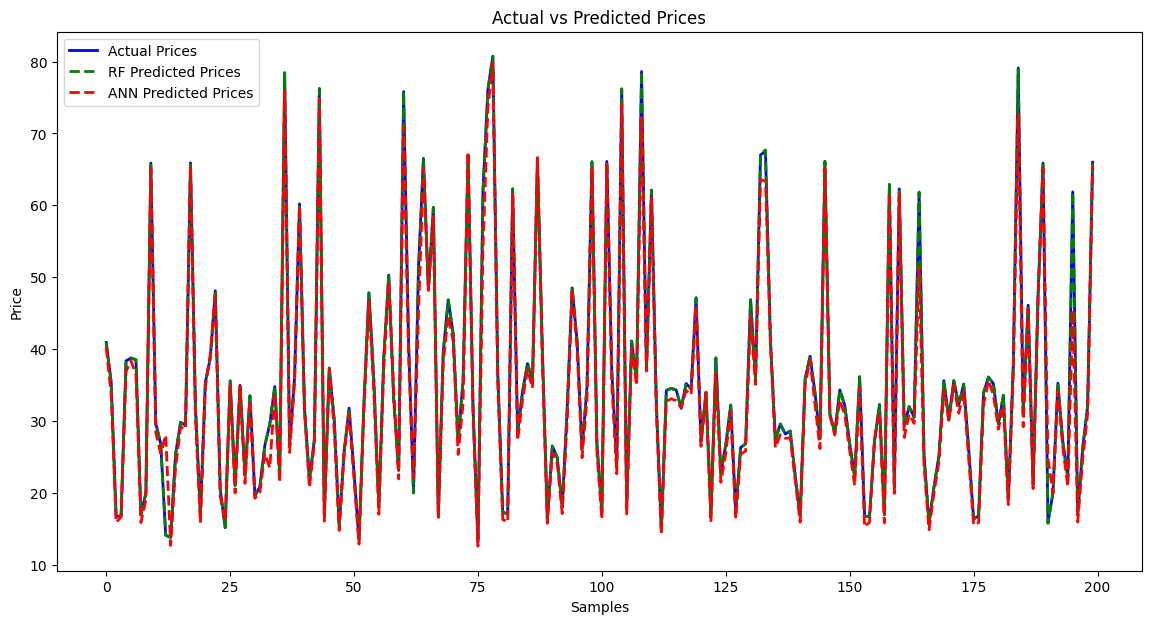

In [76]:
import matplotlib.pyplot as plt

# Limit the number of samples for plotting
num_samples = 200  # Adjust this number to get a clearer plot

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))

plt.plot(y_test.values[:num_samples], label='Actual Prices', color='blue', linewidth=2)
plt.plot(best_rf_pred[:num_samples], label='RF Predicted Prices', linestyle='--', color='green', linewidth=2)
plt.plot(best_ann_pred[:num_samples], label='ANN Predicted Prices', linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


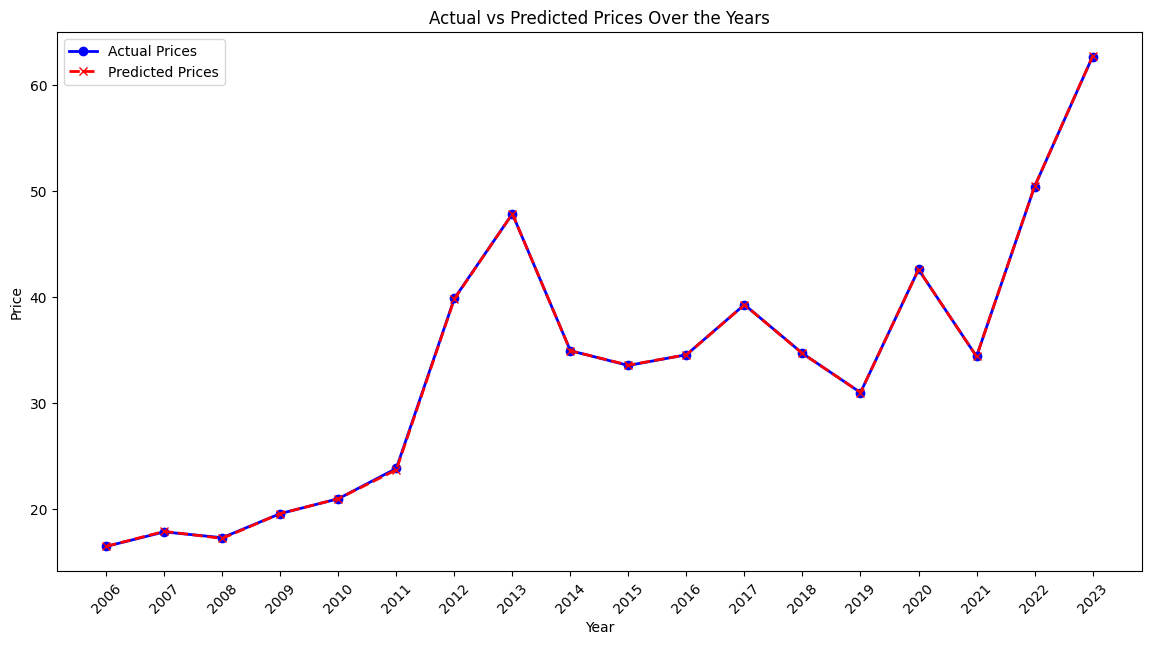

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset indices to avoid duplicate label issues
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = pd.Series(y_test.values, index=X_test_reset.index)
best_rf_pred_reset = pd.Series(best_rf_pred, index=X_test_reset.index)

# Create DataFrame for actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test_reset,
    'Predicted Price': best_rf_pred_reset,
    'Year': X_test_reset['Year']
})

# Convert Year to integer to ensure it is plotted correctly
comparison_df['Year'] = comparison_df['Year'].astype(int)

# Group by year and calculate the mean prices
yearly_comparison = comparison_df.groupby('Year').mean()

# Plot the actual vs predicted prices over the years
plt.figure(figsize=(14, 7))

# Plot actual prices with markers
plt.plot(yearly_comparison.index, yearly_comparison['Actual Price'], label='Actual Prices', color='blue', linewidth=2, marker='o')

# Plot predicted prices with markers
plt.plot(yearly_comparison.index, yearly_comparison['Predicted Price'], label='Predicted Prices', color='red', linewidth=2, linestyle='--', marker='x')

plt.title('Actual vs Predicted Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(yearly_comparison.index, yearly_comparison.index, rotation=45)  # Ensure years are displayed as integers
plt.legend()
plt.show()


In [85]:
pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [86]:
# Display the columns of expanded_df to check for the presence of 'Region' and 'County'
print("Columns in expanded_df:")
print(expanded_df.columns)


Columns in expanded_df:
Index(['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi',
       'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley',
       'Region_Western', 'Usdprice_0.1586',
       ...
       'County_Taita-Taveta', 'County_Tana River', 'County_Tharaka-Nithi',
       'County_Trans-Nzoia', 'County_Turkana', 'County_Uasin Gishu',
       'County_Vihiga', 'County_Wajir', 'County_West Pokot', 'Price'],
      dtype='object', length=2346)


In [89]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming the model and data have already been loaded and prepared

# Verify the columns of expanded_df
print("Columns in expanded_df:")
print(expanded_df.columns)

# Extract unique regions and counties
regions = [col.replace('Region_', '') for col in expanded_df.columns if col.startswith('Region_')]
counties = [col.replace('County_', '') for col in expanded_df.columns if col.startswith('County_')]

# Create a region to county mapping (assuming counties have regions in their names)
county_region_map = {
    'Coast': ['Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita-Taveta'],
    'Eastern': ['Machakos', 'Makueni', 'Kitui', 'Embu', 'Meru', 'Isiolo', 'Tharaka-Nithi'],
    'Nairobi': ['Nairobi'],
    'North Eastern': ['Garissa', 'Wajir', 'Mandera'],
    'Nyanza': ['Kisumu', 'Siaya', 'Homa Bay', 'Migori', 'Kisii', 'Nyamira'],
    'Rift Valley': ['Uasin Gishu', 'Elgeyo-Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Samburu', 'Turkana', 'West Pokot'],
    'Western': ['Kakamega', 'Vihiga', 'Bungoma', 'Busia'],
}

# Create widgets for user inputs
region_widget = widgets.Dropdown(
    options=regions,
    description='Region:',
    disabled=False
)

county_widget = widgets.Dropdown(
    options=county_region_map[regions[0]],  # Default to the first region's counties
    description='County:',
    disabled=False
)

year_widget = widgets.IntSlider(
    value=2025,
    min=2024,
    max=2030,
    step=1,
    description='Year:',
    disabled=False
)

month_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Month:',
    disabled=False
)

# Update counties based on the selected region
def update_counties(*args):
    selected_region = region_widget.value
    county_widget.options = county_region_map[selected_region]

region_widget.observe(update_counties, names='value')

# Display the widgets
display(region_widget, county_widget, year_widget, month_widget)

# Prepare the input data
def predict_price(region, county, year, month):
    # Check if 'Annual Temperature' exists, otherwise use a default value
    avg_temperature = expanded_df['Annual Temperature'].mean() if 'Annual Temperature' in expanded_df.columns else 0

    # Check if 'Annual Rainfall' exists, otherwise use a default value
    avg_rainfall = expanded_df['Annual Rainfall'].mean() if 'Annual Rainfall' in expanded_df.columns else 0

    # Check if 'Amount Produced(Tonnes)' exists, otherwise use a default value
    avg_production = expanded_df['Amount Produced(Tonnes)'].mean() if 'Amount Produced(Tonnes)' in expanded_df.columns else 0

    input_data = {
        'Year': year,
        'Month': month,
        'Annual Temperature': avg_temperature,
        'Annual Rainfall': avg_rainfall,
        'Amount Produced(Tonnes)': avg_production,
        f'County_{county}': 1,
        f'Region_{region}': 1
    }

    # Add missing columns as 0
    for col in features:
        if col not in input_data:
            input_data[col] = 0

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict using the trained ANN model
    predicted_price = best_ann_model.predict(input_df[features])[0]

    return predicted_price

# Function to display the predicted price
def on_button_click(b):
    region = region_widget.value
    county = county_widget.value
    year = year_widget.value
    month = month_widget.value

    predicted_price = predict_price(region, county, year, month)
    print(f'Predicted Price for {county}, {region} in {year}-{month}: {predicted_price:.2f} KES')

# Create a button to trigger prediction
button = widgets.Button(description="Predict Price")
button.on_click(on_button_click)

# Display the button
display(button)


Columns in expanded_df:
Index(['Year', 'Month', 'Region_Coast', 'Region_Eastern', 'Region_Nairobi',
       'Region_North Eastern', 'Region_Nyanza', 'Region_Rift Valley',
       'Region_Western', 'Usdprice_0.1586',
       ...
       'County_Taita-Taveta', 'County_Tana River', 'County_Tharaka-Nithi',
       'County_Trans-Nzoia', 'County_Turkana', 'County_Uasin Gishu',
       'County_Vihiga', 'County_Wajir', 'County_West Pokot', 'Price'],
      dtype='object', length=2346)


Dropdown(description='Region:', options=('Coast', 'Eastern', 'Nairobi', 'North Eastern', 'Nyanza', 'Rift Valle…

Dropdown(description='County:', options=('Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita-Taveta'), …

IntSlider(value=2025, description='Year:', max=2030, min=2024)

IntSlider(value=1, description='Month:', max=12, min=1)

Button(description='Predict Price', style=ButtonStyle())

Predicted Price for Wajir, North Eastern in 2025-1: 42.09 KES
Predicted Price for Kisumu, Nyanza in 2026-1: 33.95 KES
